# MultiGroupRCD | Comparison of HSIC and F-correlation

## Import and settings

In [1]:
import random
import numpy as np
import pandas as pd
import graphviz
import lingam
from lingam.utils import print_causal_directions, print_dagc, make_dot

from IPython.display import display, Markdown

np.set_printoptions(precision=3, suppress=True)
np.random.seed(0)

## Test data
We generate two datasets consisting of 6 variables and 1 latent variable.

In [2]:
def get_coef():
    coef = random.random()
    return coef if coef >= 0.5 else coef - 1.0
get_external_effect = lambda n: np.random.normal(0.0, 0.5, n) ** 3

In [3]:
B1 = np.array([[       0.0,        0.0,        0.0,        0.0,        0.0, get_coef(),        0.0],
               [       0.0,        0.0,        0.0,        0.0,        0.0, get_coef(),        0.0],
               [get_coef(), get_coef(),        0.0,        0.0,        0.0,        0.0,        0.0],
               [       0.0,        0.0, get_coef(),        0.0,        0.0,        0.0, get_coef()],
               [       0.0,        0.0, get_coef(),        0.0,        0.0,        0.0, get_coef()],
               [       0.0,        0.0,        0.0,        0.0,        0.0,        0.0,        0.0],
               [       0.0,        0.0,        0.0,        0.0,        0.0,        0.0,        0.0]])

samples = 1000
x5 = get_external_effect(samples)
x6 = get_external_effect(samples)
x0 = x5 * B1[0, 5] + get_external_effect(samples)
x1 = x5 * B1[1, 5] + get_external_effect(samples)
x2 = x0 * B1[2, 0] + x1 * B1[2, 1] + get_external_effect(samples)
x3 = x2 * B1[3, 2] + x6 * B1[3, 6] + get_external_effect(samples)
x4 = x2 * B1[4, 2] + x6 * B1[4, 6] + get_external_effect(samples)

# x5, x6 is a latent variable.
X1 = pd.DataFrame(np.array([x0, x1, x2, x3, x4, x5]).T ,columns=['x0', 'x1', 'x2', 'x3', 'x4', 'x5'])

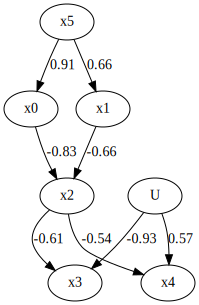

In [4]:
make_dot(B1, labels=['x0', 'x1', 'x2', 'x3', 'x4', 'x5', 'U'])

In [5]:
B2 = np.array([[       0.0,        0.0,        0.0,        0.0,        0.0, get_coef(),        0.0],
               [       0.0,        0.0,        0.0,        0.0,        0.0, get_coef(),        0.0],
               [get_coef(), get_coef(),        0.0,        0.0,        0.0,        0.0,        0.0],
               [       0.0,        0.0, get_coef(),        0.0,        0.0,        0.0, get_coef()],
               [       0.0,        0.0, get_coef(),        0.0,        0.0,        0.0, get_coef()],
               [       0.0,        0.0,        0.0,        0.0,        0.0,        0.0,        0.0],
               [       0.0,        0.0,        0.0,        0.0,        0.0,        0.0,        0.0]])

samples = 1000
x5 = get_external_effect(samples)
x6 = get_external_effect(samples)
x0 = x5 * B2[0, 5] + get_external_effect(samples)
x1 = x5 * B2[1, 5] + get_external_effect(samples)
x2 = x0 * B2[2, 0] + x1 * B2[2, 1] + get_external_effect(samples)
x3 = x2 * B2[3, 2] + x6 * B2[3, 6] + get_external_effect(samples)
x4 = x2 * B2[4, 2] + x6 * B2[4, 6] + get_external_effect(samples)

# x5, x6 is a latent variable.
X2 = pd.DataFrame(np.array([x0, x1, x2, x3, x4, x5]).T ,columns=['x0', 'x1', 'x2', 'x3', 'x4', 'x5'])

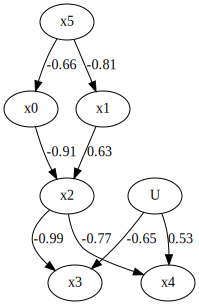

In [6]:
make_dot(B2, labels=['x0', 'x1', 'x2', 'x3', 'x4', 'x5', 'U'])

We create a list variable that contains two datasets.

In [7]:
X_list = [X1, X2]

## Causal Discovery by HSIC

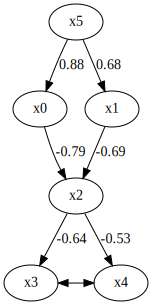

In [8]:
model = lingam.MultiGroupRCD()
model.fit(X_list)

display(make_dot(model.adjacency_matrices_[0]))

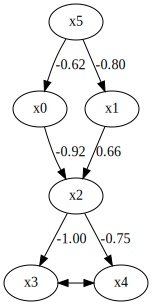

In [9]:
model = lingam.MultiGroupRCD()
model.fit(X_list)

display(make_dot(model.adjacency_matrices_[1]))

## Causal Discovery by F-correlation

### F-correlation threshold=0.7

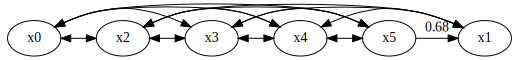

### F-correlation threshold=0.6

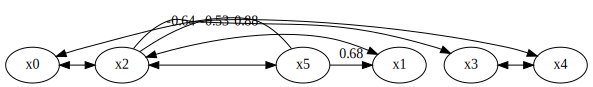

### F-correlation threshold=0.5

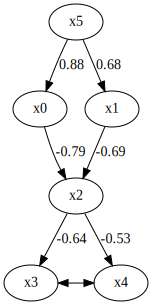

### F-correlation threshold=0.4

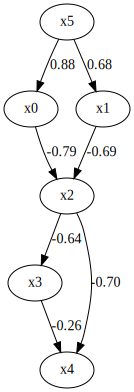

### F-correlation threshold=0.3

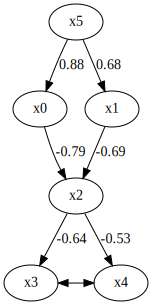

### F-correlation threshold=0.2

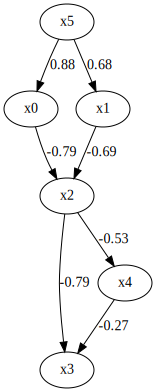

In [10]:
for ind_corr in np.linspace(0.7, 0.2, 6):
    display(Markdown(f"### F-correlation threshold={ind_corr:.1f}"))
    model = lingam.MultiGroupRCD(independence='fcorr', ind_corr=ind_corr)
    model.fit(X_list)
    display(make_dot(model.adjacency_matrices_[0]))